# Daniel suggestions

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=300)
ax = np.ravel(ax)
i = 0  # first axis
ax[i].plot()
i = 1
ax[i].plot()

fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=300)
ax = np.ravel(ax)
for i in range(len(ax)):
   # generate plots here...
    ax[i].plot()
    ax.set_xlim(), ax.set_xticks(), ax.set_xticklabels()
   # configure axis params here...
# Config fig params here.
fig.tight_layout()

# spectrogram

In [ ]:
from general import parula_map

print(np.shape(SWR_across_sessions))

matshow(np.mean(stats.zscore(SWR_across_sessions,2), 0), fignum=0, aspect='auto', cmap=parula_map, vmin=0, vmax=1.6) # 'viridis'

# y-axis
gca().invert_yaxis()
ytick_size = 50
yticks(np.arange(0,len(freqs),ytick_size), np.arange(25,225.1,ytick_size,dtype=int), fontsize=12) # positions, labels
# setp(gca().get_yticklabels()[::2], visible=False) # get every other
ylabel('Frequency (Hz)', fontsize=14)

# x-axis
gca().xaxis.set_ticks_position('bottom')
xtick_size = 100
xticks(np.arange(0,2*morlet_dist+0.1,xtick_size), np.arange(-200,200+0.1,xtick_size,dtype=int),fontsize=12)
# setp(gca().get_xticklabels()[::2], visible=False)
xlabel('Time (ms)', fontsize=14)
colorbar();

if save_fig == 1:
    fname = '/home1/john/SWR/figures/spectrograms/'+sub+'_'+\
        location_selected+'_'+str(np.shape(SWR_across_sessions)[0])+'_ripples.pdf'
    savefig(fname,format='pdf',transparent=True)

## NEED TO DO THIS FOR MATPLOTLIB TOOOO

In [ ]:
def set_pubfig():
    sb.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14,"axes.ticksize":12}) 
    
def defaultPlotting(): 
    sb.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")

set_pubfig() # defaultPlotting()
plot_df = pd.DataFrame({'avg_recall_num':sub_avg_recall_num,'ripple_rates':rate_accum})
fig1 = sb.lmplot(x='avg_recall_num',y='ripple_rates',data=plot_df,line_kws = {'color': 'black'},scatter_kws = {'color': 'black'})
gca().set(ylim=(0,0.85),xlim=(1.5,5.5))
gca().tick_params(labelsize=12)
# gca().set_xticks(gca().get_xticks())
# gca().set_xticklabels(gca().get_xticks(),rotation=0)
# gca().set_ylabel(size=14)
# gca().set(xticks=np.arange(2,5,0.5))

plot_corr = np.corrcoef(sub_avg_recall_num,rate_accum)[0][1]
annotate('Correlation: '+str(np.round(plot_corr,3)),(3,0.025))
ylabel('Pre-recall bin ripple rates (Hz)')
xlabel('Average recalls/list for subject')
title('Ripple rates v. memory performance')
show()

## correlation and linear fit

In [ ]:
# Fig 2c is logit(conn) values v. the residuals of t-statistic after factoring out distance

stim_distmat = distmat[stimbp] # get distances from stim channel
stim_distmat[~good_chan] = np.nan; sess_Ts[~good_chan] = np.nan # bad channels will be removed
stim_distmat[stimbp] = np.nan; sess_Ts[stimbp] = np.nan # just in case not already remove stim channel too
resid_stim = residTstat(stim_distmat, sess_Ts)

fig2c,ax2c = plt.subplots()
_ = ax2c.plot(good_conns,resid_stim,marker='o',markerfacecolor=[0,0,0],
          markersize=5,alpha=1,linestyle='',label='',markeredgewidth=0)
_ = ax2c.spines['top'].set_visible(False)
_ = ax2c.spines['right'].set_visible(False)
_ = ax2c.set_ylabel('Residual stim. effect')
_ = ax2c.set_xlabel('Logit (5-13 Hz coherence)')

corr = np.corrcoef(resid_stim,good_conns)
corr

reg = stats.linregress(good_conns,resid_stim) #slope, intercept, r_value
print(reg.pvalue)

# add r and line fit to plot
xr = np.arange(np.min(good_conns),np.max(good_conns),0.01)
_ = ax2c.plot(xr,xr*reg.slope+reg.intercept,marker='',linewidth=2,linestyle='--',color=[1,0,0])
_ = ax2c.text(-1,-1,'r = '+str(round(reg.rvalue,2)))
_ = fig2c.tight_layout()
ax2c.tick_params(axis='x',which='both',bottom=True)
ax2c.tick_params(axis='y',which='both',left=True)
if save_figs == 1:
    plt.savefig('figures/'+sub+'/Fig2C-sess'+str(session)+'.pdf',transparent=True) 

## plot by parametric colors and inset plot

In [ ]:
# now can visualize by plotting the binned average of each

stats_bin = 500 # time bin width in ms to test stats on

xr = np.arange(250,4001,500)

from matplotlib import cm
colormap = plt.cm.inferno # copper
colors = [colormap(i) for i in np.linspace(0, 0.7, len(plot_save))]

delta_ripple_rate = []

for i,num_recalls in enumerate(range(len(plot_save))):
    
    # bin it
    temp_binned_array = binBinaryArray(np.array(plot_save[num_recalls])[:,1:],stats_bin,sr_factor)
    
    delta_ripple_rate.append(np.mean(temp_binned_array[:,3])-np.mean(temp_binned_array[:,1]))
    
    plot(xr,np.mean(temp_binned_array,0),color=colors[i])

title('Subject '+sub)
ylabel('Ripple rate')
xlabel('Time from recall (ms)')
xticks(xr-250,np.arange(-2000,2001,500))
gca().set_ylim(0,0.7)
gca().set_xlim(0,4000)
legend(unique_recall_nums,title='Number of recalls in list',ncol=2,frameon=False)

# plot delta ripple rate v. number of recalls

# for num_recalls in range(len(plot_save)):

axins = gca().inset_axes([0.2, 0.125, 0.25, 0.25])
    
axins.plot(unique_recall_nums,delta_ripple_rate,color=(0,0,0))
axins.tick_params(labelsize=8)

axins.set_ylabel(u'Δ ripple rate (Hz)')
axins.set_xlabel('Recalls/list')
axins.xaxis.set_label_coords(0.51,-0.29) 
axins.set_ylim(0,0.17)
gcf().tight_layout()
axins.set_xticks(np.arange(np.min(unique_recall_nums),np.max(unique_recall_nums)+0.01,1))
axins.set_yticks(np.arange(0,np.max(delta_ripple_rate),0.05))

# reg = stats.linregress(unique_recall_nums,delta_ripple_rate) #slope, intercept, r_value
# annotate('Correlation: '+str(np.round(reg.rvalue,3)),(3.5,-0.2))

xr = np.arange(np.min(unique_recall_nums),np.max(unique_recall_nums),0.01)
axins.plot(xr,xr*reg.slope+reg.intercept,marker='',linewidth=2,linestyle='dotted',color=[1,0,0])

a = 1;

/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


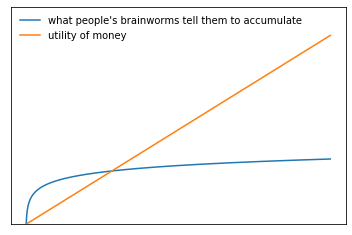

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

xr = np.arange(1000)

y = np.log(xr)
plot(xr,y)
gca().set_xticks([])
gca().set_yticks([])

yy = 0.02*xr
plot(xr,yy)

gca().set_ylim(0,23)
legend({'utility of money',"what people's brainworms tell them to accumulate"},frameon=False);